In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(42)
k = 81  # last 2 digit of phone number
data = 60 + np.random.randint(0, 15, size=12) + (k % 5)

print("Dataset (exam scores):", data)

Dataset (exam scores): [67 64 73 75 71 68 73 65 67 70 63 67]


In [3]:
mu_0 = 65

In [5]:
t_stat, p_value = stats.ttest_1samp(data, mu_0)
df = len(data) - 1
sample_mean = np.mean(data)

print("\nt-Test Results")
print(f"Sample mean      = {sample_mean:.2f}")
print(f"Hypothesized μ   = {mu_0}")
print(f"t-statistic      = {t_stat:.4f}")
print(f"Degrees of freedom (df) = {df}")
print(f"p-value          = {p_value:.4f}")


t-Test Results
Sample mean      = 68.58
Hypothesized μ   = 65
t-statistic      = 3.2454
Degrees of freedom (df) = 11
p-value          = 0.0078


In [7]:
alpha = 0.05
sem = stats.sem(data)  # standard error of mean
ci = stats.t.interval(0.95, df, loc=sample_mean, scale=sem)

print("\n95% Confidence Interval")
print(f"95% CI for mean = {ci[0]:.2f} to {ci[1]:.2f}")



95% Confidence Interval
95% CI for mean = 66.15 to 71.01


In [9]:
if p_value < alpha:
    decision = "Reject H0 → The sample mean is significantly different from 65."
else:
    decision = "Fail to Reject H0 → The sample mean is not significantly different from 65."

print("\nDecision")
print(decision)


Decision
Reject H0 → The sample mean is significantly different from 65.


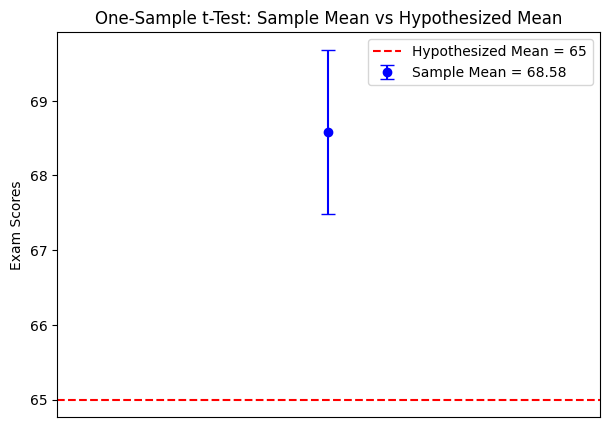

In [10]:
plt.figure(figsize=(7,5))
plt.errorbar(x=1, y=sample_mean, yerr=sem, fmt='o', color='blue',
             capsize=5, label=f"Sample Mean = {sample_mean:.2f}")
plt.axhline(mu_0, color='red', linestyle='--', label="Hypothesized Mean = 65")
plt.xlim(0,2)
plt.xticks([])
plt.ylabel("Exam Scores")
plt.title("One-Sample t-Test: Sample Mean vs Hypothesized Mean")
plt.legend()
plt.show()